<a href="https://colab.research.google.com/github/kumar200317/major_project/blob/main/major_source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
# def get_dataset_partions(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 50):

#   ds_size = len(ds)
#   train_size = int(train_split * ds_size)
#   val_size = int(val_split * ds_size)

#   train_ds = ds.take(train_size)
#   val_ds = ds.skip(train_size).take(val_size)
#   test_ds = ds.skip(train_size).skip(val_size)

#   return train_ds, val_ds, test_ds

In [ ]:
# plt.figure(figsize = (10,10))
# for image_batch, label_batch in dataset.take(1):
#   for i in range(12):
#       ax = plt.subplot(3,4,i+1)
#       plt.imshow(image_batch[i].numpy().astype('uint8'))
#       plt.axis('off')
#       # plt.title(class_names[label_batch[1]])
#       plt.title(class_names[label_batch[i]])
#   # print(image_batch[0].shape)
#   # print(label_batch.numpy())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libaries
import cv2
import os
import numpy as np
from rembg import remove
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/major/Data set1',

    batch_size = 30
)

Found 1057 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['affected', 'non affected']

In [ ]:

images, labels = [], []
for image_batch, label_batch in dataset:
    images.extend(image_batch)
    labels.extend(label_batch)

images = np.array(images)
labels = np.array(labels)

In [ ]:
def remove_background(image):
      image = image.numpy().astype('uint8')
      image = cv2.cvtColor(image[..., ::-1], cv2.COLOR_RGB2BGR)
      output = remove(image)
    #   output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
      return output


def preprocess_segment_image(image):


  output = remove_background(image)


  gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)


  thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]


  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


  largest_contour = max(contours, key=cv2.contourArea)

  x, y, w, h = cv2.boundingRect(largest_contour)


  cropped_image = output[y:y+h, x:x+w]


  np_cropped_image = np.array(cropped_image)
  resized_image = cv2.resize(cropped_image, (256, 256))
  np_image = np.array(resized_image)
  rescaled_image = np_image/255
  return rescaled_image

In [ ]:
plt.imshow(images[0].numpy().astype('uint8'))
preprocessed_images = [preprocess_segment_image(image) for image in images]
plt.imshow(preprocessed_images[0])

In [ ]:
train_val_images,test_images,train_val_labels,test_labels = train_test_split(images,labels, test_size = 0.2)
train_images,val_images,train_labels,val_labels = train_test_split(train_val_images,train_val_labels,test_size=0.15)

In [ ]:
train_labels = train_labels.astype(np.int32)
val_labels = val_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [ ]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))
print(len(val_images))
print(len(val_labels))
print(train_images[0].shape)

718
718
212
212
127
127
(256, 256, 3)


In [ ]:
img_height, img_width, channels = train_images.shape[1:]
input_shape = (img_height, img_width, channels)

In [ ]:

def cnn_model():
    n_classes = 2
    input_shape = (256, 256, 3)

    model = models.Sequential(
        [

            layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape,name = 'layer1'),
            layers.MaxPooling2D((2,2),name = 'layer11'),
            layers.Conv2D(64, kernel_size = (3,3), activation = 'relu',name = 'layer2'),
            layers.MaxPooling2D((2,2),name = 'layer22'),
            layers.Conv2D(64, kernel_size = (3,3), activation = 'relu',name = 'layer3'),
            layers.MaxPooling2D((2,2),name = 'layer33'),
            layers.Conv2D(64, (3,3), activation = 'relu',name = 'layer4'),
            layers.MaxPooling2D((2,2),name = 'layer44'),
            layers.Conv2D(64, (3,3), activation = 'relu',name = 'layer5'),
            layers.MaxPooling2D((2,2),name = 'layer55'),
            layers.Conv2D(64, (3,3), activation = 'relu',name = 'layer6'),
            layers.MaxPooling2D((2,2),name = 'layer66'),

            layers.Flatten(),
            layers.Dense(64, activation = 'relu'),
            layers.Dense(n_classes, activation = 'softmax')

        ]
    )

    # model.build(input_shape = input_shape)
    model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    return model

In [ ]:
model = cnn_model()
history = model.fit(
    train_images,
    train_labels,
    epochs = 50,

    verbose = 1,
    validation_data = (val_images,val_labels)
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 93s 4s/step - loss: 2.1536 - accuracy: 0.6407 - val_loss: 0.2488 - val_accuracy: 0.9134
Epoch 2/50
23/23 [==============================] - 94s 4s/step - loss: 0.1523 - accuracy: 0.9457 - val_loss: 0.5333 - val_accuracy: 0.7795
Epoch 3/50
23/23 [==============================] - 91s 4s/step - loss: 0.3389 - accuracy: 0.8663 - val_loss: 0.0859 - val_accuracy: 0.9764
Epoch 4/50
23/23 [==============================] - 91s 4s/step - loss: 0.1134 - accuracy: 0.9680 - val_loss: 0.0761 - val_accuracy: 0.9685
Epoch 5/50
23/23 [==============================] - 90s 4s/step - loss: 0.0408 - accuracy: 0.9889 - val_loss: 0.0613 - val_accuracy: 0.9764
Epoch 6/50
23/23 [==============================] - 87s 4s/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0509 - val_accuracy: 0.9685
Epoch 7/50
23/23 [==============================] - 89s 4s/step - loss: 0.0112 - accuracy: 0.9972 - val_loss: 0.0953 - val_accuracy: 0.9764
Epoch 8/50
23/23 [=============

In [ ]:
def predict_image(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_segment_image(image)
    classes = ['affected','non affected']
    prediction = model.predict(preprocessed_image)
    return classes[np.argmax(prediction)]
predict(test_images[0])

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 118GB/s]


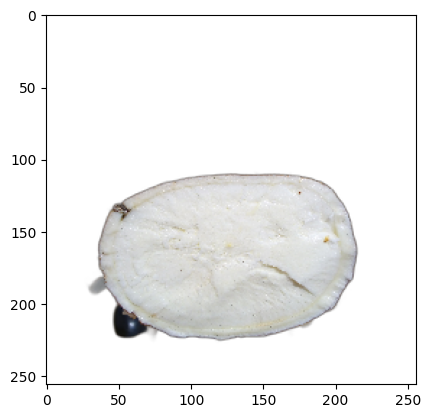

In [ ]:
  image = images[0].numpy().astype('uint8')
  image = cv2.cvtColor(image[..., ::-1], cv2.COLOR_RGB2BGR)
  plt.imshow(remove(image).astype('uint8'))

In [ ]:
for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(images[i].astype('uint8'))
      plt.axis('off')
      # plt.title(class_names[label_batch[1]])
      plt.title(class_names[labels[i]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log = LogisticRegression(max_iter = 1000)

train_images = train_images.reshape(-1, img_height * img_width * channels)
log.fit(train_images,train_labels)
log_predictions = log.predict(test_images.reshape(-1, img_height * img_width * channels))

In [ ]:
print(classification_report(test_labels,log_predictions,target_names = class_names))

              precision    recall  f1-score   support

    affected       0.94      0.94      0.94       109
non affected       0.93      0.93      0.93       103

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.93      0.93       212



In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_images,train_labels)
svm_predictions = svc.predict(test_images.reshape(-1, img_height * img_width * channels))

In [ ]:
print(classification_report(test_labels,svm_predictions,target_names = class_names ))

              precision    recall  f1-score   support

    affected       0.97      0.90      0.93       109
non affected       0.90      0.97      0.93       103

    accuracy                           0.93       212
   macro avg       0.94      0.93      0.93       212
weighted avg       0.94      0.93      0.93       212



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_images,train_labels)
rfc_predictions = rfc.predict(test_images.reshape(-1, img_height * img_width * channels))
print(classification_report(test_labels,rfc_predictions,target_names = class_names))

              precision    recall  f1-score   support

    affected       0.93      0.93      0.93       109
non affected       0.92      0.92      0.92       103

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212



In [ ]:
print(input_shape)

In [ ]:
# train_data, validation_data, test_data = get_dataset_partions(dataset)

In [ ]:
# Suggested Changes

data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.Rescaling(1/255), # Normalize pixel values
    ]
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocess_segment_image()),
    ('classifier', KerasClassifier(build_fn=cnn_model, epochs=50, verbose=1))
])


In [ ]:
history = pipeline.fit(train_images,train_labels,keras_classifier__validation_data=(val_images, val_labels))

In [ ]:
model.summary()

In [ ]:
scores = model.evaluate(test_images,test_labels)

7/7 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
predictions = model.predict(test_images)

7/7 [==============================] - 1s 121ms/step


In [ ]:
prediction_class = np.argmax(predictions, axis = 1)
from sklearn.metrics import classification_report
report = classification_report(test_labels,prediction_class,target_names = class_names)

In [ ]:
print(report)

              precision    recall  f1-score   support

    affected       0.99      0.98      0.99       103
non affected       0.98      0.99      0.99       109

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [ ]:
history.history['accuracy']

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

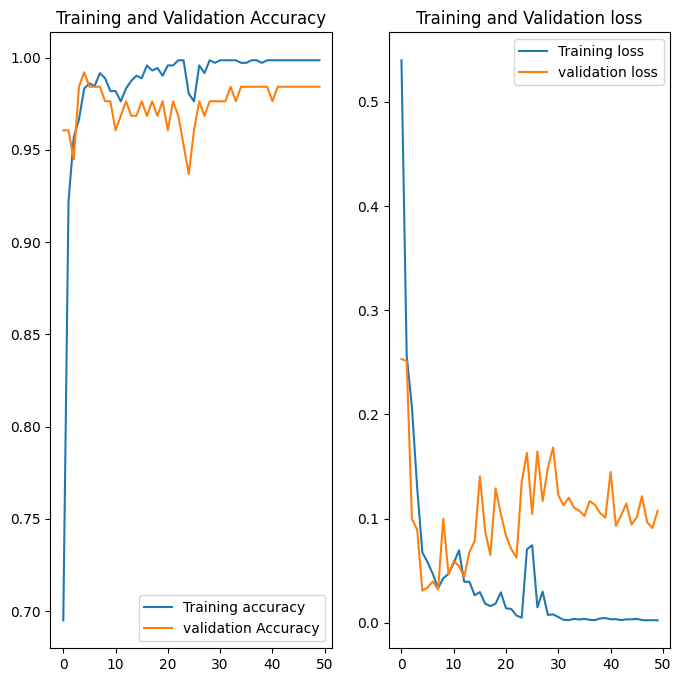

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label = 'Training accuracy')
plt.plot(range(50), val_acc, label = 'validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label = 'Training loss')
plt.plot(range(50), val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title("Training and Validation loss")

plt.show()

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  else:
    filters, biases = layer.get_weights()
    print(layer.name,filters.shape)
    print(filters)
    print('biases',biases)

conv2d (3, 3, 3, 32)
[[[[ 8.60005096e-02  9.92134511e-02  1.13316894e-01 -9.80570838e-02
    -8.29354376e-02 -1.04244813e-01 -8.06075260e-02  3.42961848e-02
    -9.10124406e-02 -5.59494272e-02  4.98075411e-02 -1.35172457e-01
    -7.45657012e-02  1.63698643e-01 -9.63501036e-02  6.55760542e-02
     5.13988584e-02 -1.14888072e-01  9.87244025e-02  3.83415492e-03
     1.51366126e-02  3.88749912e-02  3.37795913e-02 -1.35875955e-01
    -1.45017598e-02  6.43378422e-02  8.55334401e-02 -9.94066820e-02
     4.84454855e-02 -1.49483964e-01  8.24732929e-02  5.02330102e-02]
   [ 3.12485341e-02 -1.07600447e-03 -8.94249678e-02 -1.44841224e-01
     1.17592335e-01 -5.26522752e-03 -5.07421233e-03  2.91477237e-02
    -1.09756105e-01  1.05026051e-01  1.10130891e-01 -7.30750263e-02
     9.45702940e-02 -8.19108486e-02  3.32570374e-02  4.72016744e-02
    -1.34554744e-01  1.19606309e-01 -1.27512798e-01  5.40915765e-02
     8.15586522e-02 -1.34531647e-01  1.34929031e-01  1.20357282e-01
     1.05888173e-01 -7.389

In [ ]:
#vgg model
import tensorflow as tf
from tensorflow.keras import models, layers, applications

vgg_model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
n_classes = 2

vgg_model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    vgg_model,
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])


In [ ]:
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg_history = vgg_model.fit(train_data, epochs=50, batch_size=30, verbose=1, validation_data=validation_data)


In [ ]:
vgg_scores = vgg_model.evaluate(test_data)


5/5 [==============================] - 31s 715ms/step - loss: 0.6945 - accuracy: 0.4488


In [ ]:
#resnet50
resnet50_model = applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
n_classes = 2

resnet50_model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    resnet50_model,
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])
resnet50_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50_model.fit(train_data, epochs=50, batch_size=30, verbose=1, validation_data=validation_data)


In [ ]:
resnet50_scores = resnet50_model.evaluate(test_data)

5/5 [==============================] - 2s 346ms/step - loss: 0.2814 - accuracy: 0.9370


In [ ]:
#InceptionV3

InceptionV3_model = applications.InceptionV3(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
n_classes = 2

InceptionV3_model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    InceptionV3_model,
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])


InceptionV3_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
InceptionV3_history = InceptionV3_model.fit(train_data, epochs=50, batch_size=30, verbose=1, validation_data=validation_data)

In [ ]:
InceptionV3_scores = InceptionV3_model.evaluate(test_data)

5/5 [==============================] - 2s 518ms/step - loss: 0.4269 - accuracy: 0.8031


In [ ]:
import numpy as np

In [ ]:
# for images, labels in test_data.take(1):
#   first_image = images[0].numpy().astype('uint8')
#   first_label = labels[0].numpy()
first_image = tf.keras.preprocessing.image.load_img('/content/image-22.jpg',target_size= (256,256))
print('first image to predict')
plt.imshow(first_image)
# print('first_image actual label :', class_names[first_label])
print('predicted : ',class_names[np.argmax(model.predict(images)[0])])

In [ ]:
# # featuer_image = tf.keras.preprocessing.image.load_img(,target_size= (256,256))
# for images, labels in test_data.take(1):
#   image = images[0].numpy().astype('uint8')
#   featuer_image_array = tf.keras.preprocessing.image.img_to_array(image)

#   desired_layer_output = model.layers[-3].output
#   activation_model = tf.keras.Model(inputs = model.input, outputs = desired_layer_output)
#   activations = activation_model.predict(images)[0]
#   plt.imshow(activations[0,:,:, 0], cmap = 'viridis' )
#   plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf

# def visualize_layers(model, image):
#     # Convert the image to the required format
#     image_array = tf.expand_dims(image, axis=0)

#     # Create a list to store activations for each layer
#     layer_activations = []

#     # Iterate over each layer in the model
#     skip_layers = 0
#     for layer in model.layers:
#         try:
#             activation_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
#             _ = activation_model.predict(image_array)
#         except ValueError:
#             skip_layers += 1
#         else:
#             break
#     for layer in model.layers[skip_layers:]:
#         # Define a model that outputs activations from the current layer
#         activation_model = tf.keras.Model(inputs=model.input, outputs=layer.output)

#         # Get activations for the image
#         activations = activation_model.predict(image_array)

#         # Store activations for the current layer
#         layer_activations.append(activations)

#     # Visualize activations for each layer
#     for i, activation in enumerate(layer_activations):
#         plt.figure()
#         plt.title(f'Layer {i+1}')

#         # For simplicity, show only the first activation map if available
#         if len(activation.shape) == 4:
#             plt.imshow(activation[0, :, :, 0], cmap='viridis')
#         elif len(activation.shape) == 2:
#             plt.imshow(activation, cmap='viridis')

#         plt.axis('off')
#         plt.show()

# # Assuming 'model' is defined earlier
# # Load and preprocess the image
# image_path = '/content/image-22.jpg'
# image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
# image = tf.keras.preprocessing.image.img_to_array(image)
# image = image / 255.0  # Normalize pixel values to [0, 1]

# # Visualize how the image is processed in each layer of the model
# visualize_layers(model, image)


In [ ]:
# dataset = '/content/drive/MyDrive/major/Data set'
# classes = {'affected' : 1, 'non affected' : 0}
# images = []
# labels = []
# for cls in classes:
#   path = '/content/drive/MyDrive/major/Data set/'+cls
#   for image in os.listdir(path):
#     images.append(cv2.imread(path + '/' + image , 1))
#     labels.append(classes[cls])

In [ ]:
# train_size = 0.8
# print(len(dataset)*train_size)
# train_dataset = dataset.take(8)
# print(len(train_dataset))
# test_dataset = dataset.skip(8)
# print(len(test_dataset))
# val_size = 0.1
# print(len(dataset)*val_size)
# val_dataset = test_dataset.take(1)
# print(len(val_dataset))
# test_dataset = test_dataset.skip(1)
# print(len(test_dataset))

In [ ]:
resize_and_rescale = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(256, 256),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
        layers.experimental.preprocessing.RandomRotation(0.2),
    ]
)

In [ ]:
# import matplotlib.pyplot as plt
# import tensorflow as tf

# def visualize_layers(model, image):
#     # Convert the image to the required format
#     image_array = tf.expand_dims(image, axis=0)

#     # Create a list to store activations for each layer
#     layer_activations = []

#     # Determine the index of the first layer that does not cause disconnection
#     skip_layers = 0
#     for layer in model.layers:
#         try:
#             activation_model = tf.keras.Model(inputs=model.input, outputs=layer.output)
#             _ = activation_model.predict(image_array)
#         except ValueError:
#             skip_layers += 1
#         else:
#             break

#     # Iterate over each layer in the model, starting from the first layer that does not cause disconnection
#     for layer in model.layers[skip_layers:]:
#         # Define a model that outputs activations from the current layer
#         activation_model = tf.keras.Model(inputs=model.input, outputs=layer.output)

#         # Get activations for the image
#         activations = activation_model.predict(image_array)

#         # Store activations for the current layer
#         layer_activations.append(activations)

#     # Visualize activations for each layer
#     for i, activation in enumerate(layer_activations):
#         plt.figure()
#         plt.title(f'Layer {i+skip_layers+1}')  # Start counting from the first layer that does not cause disconnection

#         # For simplicity, show only the first activation map if available
#         if len(activation.shape) == 4:
#             plt.imshow(activation[0, :, :, 0], cmap='viridis')
#         elif len(activation.shape) == 2:
#             plt.imshow(activation, cmap='viridis')

#         plt.axis('off')
#         plt.show()

# # Assuming 'model' and 'test_data' are defined earlier
# for images, labels in test_data.take(1):
#     visualize_layers(model, images[0])
